# **Minicurso: Introdução à Geologia De Sensoriamento Remoto com Python**

---

**XXXIV Semana de Estudos Geológicos da Universidade Federal Rural do Rio de Janeiro (SEGEO)**

### _Rodrigo Brust Santos_

#### Setembro 2024

---

**Tópicos:**
01) Introdução ao Sensoriamento Remoto & Python
02) Manipulando rasters
03) Índices de bandas, diferenças normalizadas, composições RGB
04) Sensoriamento Remoto Aplicado à Geologia

---

## 1 - Bandas Normalizadas e Band Ratios 


Os band ratios são usados para enfatizar diferentes materiais ou feições da superfície terrestre ao dividir os valores de uma banda por outra. Essa técnica é muito útil na geologia para identificar minerais, solos e alterações na superfície terrestre.

**Exemplos em Geologia:**

- Índice de Alteração de Ferro (Fe2+ Ratio): Razão entre bandas no infravermelho próximo (NIR) e a banda do vermelho, usada para detectar óxidos de ferro.
- Índice de Mineralização de Óxido de Ferro: Calculado usando bandas no espectro do vermelho e do infravermelho médio (SWIR), ajudando a identificar zonas mineralizadas.

**Passo a passo:**

- Identificar as bandas corretas: Selecionar bandas espectrais que correspondem às propriedades minerais ou feições geológicas de interesse.

- Cálculo de ratios: Implementar o cálculo de band ratios entre bandas de satélite específicas.

- Interpretação: A interpretação dos resultados requer entendimento geológico e conhecimento prévio dos materiais ou minerais presentes na área de estudo.




In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import os

In [ ]:
#para baixar a imagem
import urllib.request
import os

url_imagem = 'http://rodrigobrust.com/wp-content/uploads/2024/09/ASTER_Mauritania.tif'

caminho = "./Dados/" 

if not os.path.exists(caminho): 
    os.makedirs('./Dados/')

nome_arquivo = 'ASTER_Mauritania.tif'  # definindo o nome do arquivo

salvando = os.path.join(caminho, nome_arquivo)  # criando o local para salvar

urllib.request.urlretrieve(url_imagem, salvando)  # Fazendo Download e salvando

print("Arquivo baixado com sucesso!")

In [ ]:
img_path = './Dados/ASTER_Mauritania.tif'

# Carregar bandas correspondentes ao NIR e Vermelho (exemplo para Landsat 8)
with rasterio.open(img_path) as src:
    stacked = src.read()

# Calcular o ratio (evitar divisão por zero)
band_ratio = stacked[4] / stacked[3]

# Plotar o resultado do band ratio
plt.imshow(band_ratio, cmap='gray')
plt.colorbar()
plt.title("Band Ratio B4/B3 (Iron Oxides)")
plt.show()

**Exercício**:

- Calcule as 3 band ratios da lista abaixo. Visite o catálogo de band ratios em [Awesome Mining Band Ratio](https://github.com/rodreras/awesome-mining-band-ratio).


1. Ferro Férrico (Fe3)
2. Ferro ferroso (Fe2)
3. Gossan


**Exercício:**

Junte as três imagens recem criadas em uma composição RGB. O que pode-se interpretar dela? 

# 2 - Cálculo de Normalized Differences Importantes

A diferença normalizada é uma técnica comum usada para calcular índices espectrais que realçam feições específicas da superfície, como vegetação, água, ou solo exposto. É calculada da seguinte maneira:


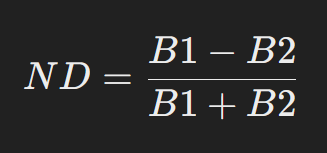


**Exemplos Comuns:**

- Índice de Vegetação por Diferença Normalizada (NDVI): Usado para mapear vegetação (NIR e Red).
- Índice de Diferença Normalizada de Água (NDWI): Destaca corpos d'água (Green e NIR).

**Passo a passo:**

- Escolher bandas adequadas: Dependendo da aplicação, como NDVI (vegetação) ou NDWI (água), selecionar as bandas corretas.

- Cálculo de índices normalizados: Implementar a fórmula de diferença normalizada.

- Interpretação: Entender os valores resultantes e o que eles representam (valores positivos geralmente indicam maior presença do fenômeno que está sendo monitorado).




In [3]:
#para baixar a imagem
import urllib.request
import os

url_imagem = 'http://rodrigobrust.com/wp-content/uploads/2024/09/L8_20240901_STACKED_Seropedica.tif'

caminho = "./Dados/" 

if not os.path.exists(caminho): 
    os.makedirs('./Dados/')

nome_arquivo = 'L8_20240901_STACKED_Seropedica.tif'  # definindo o nome do arquivo

salvando = os.path.join(caminho, nome_arquivo)  # criando o local para salvar

urllib.request.urlretrieve(url_imagem, salvando)  # Fazendo Download e salvando

print("Arquivo baixado com sucesso!")

Arquivo baixado com sucesso!


In [ ]:
# Carregar a imagem de satélite (GeoTIFF)
img_path = './Dados/L8_20240901_STACKED_Seropedica.tif' 

# Abrindo o arquivo com rasterio


##-- VISITE O AWESOME SPECTRAL INDICES PARA VER QUAIS SÃO AS BANDAS DO L9
with rasterio.open(img_path) as src:
    # Lendo a primeira banda
    banda_azul = src.read(2)
    banda_verde = src.read(3)
    banda_vermelha = src.read(4)
    banda_nir = src.read(5)
    banda_swir1 = src.read(6)
    banda_swir2 = src.read(7)

# Plotando a primeira banda
plt.imshow(banda_nir, cmap='gray')
plt.colorbar()
plt.title("Visualização da Banda 1 - Azul")
plt.show()


É preciso normalizar as bandas para calcular o NDVI.

In [ ]:

# Calcular NDVI (NIR e Red)
import earthpy.plot as ep
import earthpy.spatial as es

#usando a função normalized_diff do earthpy
ndvi = es.normalized_diff(norm_nir, norm_red)

#usando a função do earthpy para plotar as bandas
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1)
plt.show()


**Dica:** há bibliotecas que já fazem o cálculo direto dos índices mais famosos. Visite [Awesome Spectral Indices](https://awesome-ee-spectral-indices.readthedocs.io/en/latest/index.html) para conhecer mais.

**Exercício:**

Calcule o NDWI (Normalized Difference Water Index). Utilize as bandas apropriadas e interprete os valores obtidos.


# 3 - Introdução ao Álgebra de Raster para Análises Avançadas

A álgebra de rasters refere-se à aplicação de operações matemáticas em rasters, permitindo realizar operações como soma, subtração, multiplicação e divisão diretamente entre diferentes camadas ou bandas de dados rasterizados. Isso é útil para a criação de índices compostos e para a análise de múltiplas variáveis geoespaciais.

**Aplicações**:

- Criar novos índices personalizados combinando várias bandas.

- Aplicar operações condicionais (ex.: áreas com alto NDVI e NDWI ao mesmo tempo).

- Combinar resultados de diferentes bandas para realçar feições geológicas específicas.

**Passo a passo:**

- Operações básicas: Utilizar operações matemáticas simples entre diferentes bandas.

- Combinações avançadas: Combinar índices, band ratios e outros dados raster para análises complexas.

- Aplicação prática: Analisar o comportamento das bandas em áreas geológicas específicas.


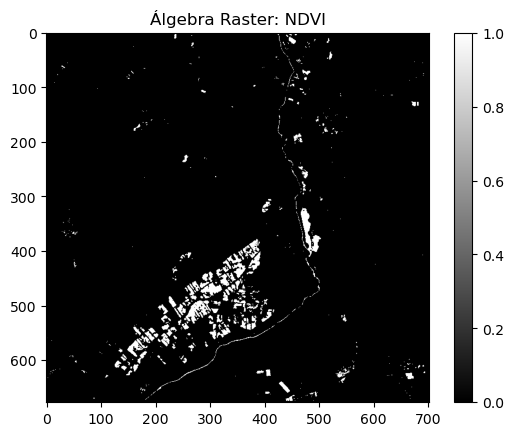

In [90]:
# Criar uma máscara onde o NDVI é menor que 0.01
ndvi_mask = (ndvi < 0.01)

# Aplicar a máscara
masked01= np.where(ndvi_mask, 1, 0)

# Plotar o resultado da álgebra raster
plt.imshow(masked01, cmap='gray')
plt.colorbar()
plt.title("Álgebra Raster: NDVI")
plt.show()

In [88]:
zeros = np.zeros_like(masked02)

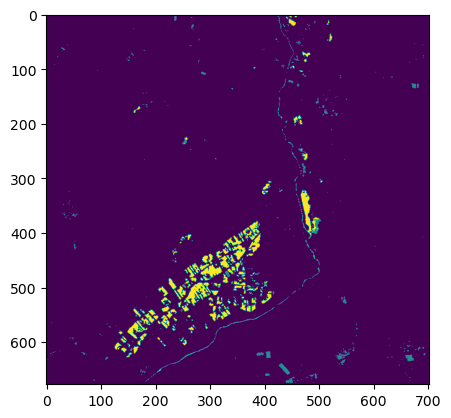

In [97]:
plt.imshow(masked01+masked02)

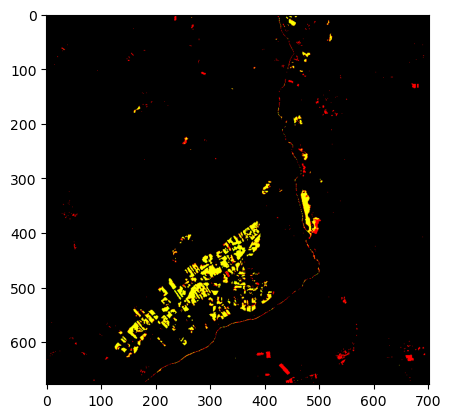

In [100]:
rgb = np.stack([masked01 * 255, #multiplicando para 8bits
                masked02 * 255, #multiplicando para 8bits
                zeros], axis = -1)

plt.imshow(rgb)